## Урок 1. Алгоритм линейной регрессии. 
## Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

### Линейная регрессия

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) # стаж
X.shape

(2, 10)

$$\vec{y}=X\vec{w}+\vec{\epsilon},$$


$$\text{где }\vec{y} = \begin{pmatrix}
y_{1}\\ 
\vdots\\ 
y_{n}
\end{pmatrix}, 
X = \begin{pmatrix}
1 & x_{1}\\ 
\vdots & \vdots\\ 
1 & x_{n}
\end{pmatrix},
\vec{w} = \begin{pmatrix}
w_{0}\\ 
w_{1}
\end{pmatrix}
$$

In [3]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

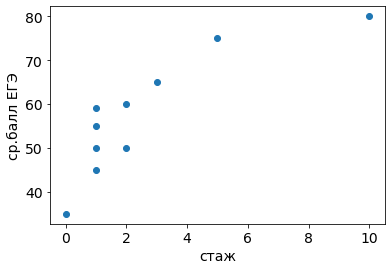

In [4]:
plt.scatter(X[1], y)
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

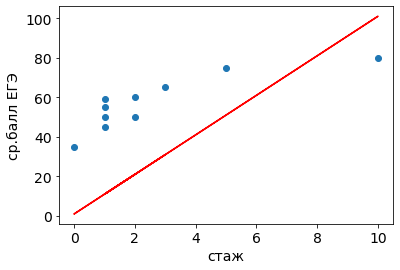

In [5]:
# y = m * x + b
m = 10
b = 1
plt.scatter(X[1], y);
plt.plot(X[1],  m * X[1] + b, color='red')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

In [6]:
y_pred1 = 45 + 4.5 * X[1] 
y_pred2 = 40 + 6 * X[1]

In [7]:
y_pred1

array([49.5, 49.5, 54. , 49.5, 58.5, 45. , 67.5, 90. , 49.5, 54. ])

In [8]:
y_pred2

array([ 46,  46,  52,  46,  58,  40,  70, 100,  46,  52])

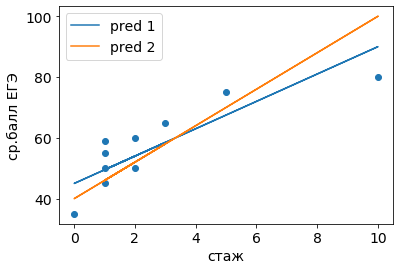

In [9]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='pred 1')
plt.plot(X[1], y_pred2, label='pred 2')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ')
plt.legend();

In [10]:
w = [35, 5]
print(w @ X)
print(np.dot(w, X))
print(np.dot(X.T, w))
print(w[0] * X[0] + w[1] * X[1])
print(np.sum(w * X.T, axis=1))

[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]


In [11]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)
err1, err2

(0.7, 1.8)

In [12]:
# mae - mean absolute error
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(6.4, 7.4)

In [13]:
# mse - mean squared error
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(49.15, 83.4)

### Метод наименьших квадратов

Нормальное уравнение линейной регрессии
$$\vec{w} = (X^{T}X)^{-1}X^{T}\vec{y}$$

In [14]:
w = np.linalg.inv(X @ X.T) @ X @ y
#w = np.dot(np.linalg.inv(np.dot(X, X.T)),X)
w

array([47.23214286,  3.91071429])

In [15]:
w1 = np.sum((y - np.mean(y)) * (X[1] - X[1].mean())) / np.sum((X[1] - X[1].mean()) ** 2)
w0 = np.mean(y) - w1 * X[1].mean()
w0, w1

(47.23214285714286, 3.910714285714285)

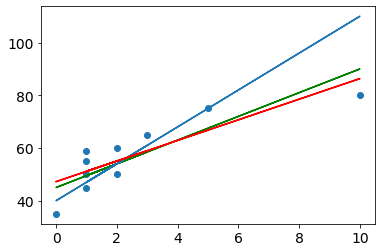

In [16]:
plt.scatter(X[1], y)
plt.plot(X[1], 45 + X[1] * 4.5, color='g')
plt.plot(X[1], 40 + X[1] * 7)
plt.plot(X[1], w[0] + w[1] * X[1], color='red');

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [18]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(6.4, 49.15)

In [19]:
y_pred3 = w[0] + w[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [20]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(6.182142857142856, 45.937499999999986)

### Градиентный спуск

$$L(w)=\frac{1}{n}\sum^{n}_{i=1}\big({y_{pred}}_i-y_{i}\big)^{2}=\frac{1}{n}\sum^{n}_{i=1}\big((w_0\cdot x_{i0}+w_1\cdot x_{i1})-y_{i}\big)^{2}\rightarrow \underset{w}{\text{min}}$$
$$w_j\leftarrow w_j-\alpha\frac{\partial}{\partial w_j}L(w)$$
$$\frac{\partial L(w)}{\partial w_j}=\frac{1}{n} 2\sum^{n}_{i=1}x_{ij}\Big(\sum^{m}_{j=0}(w_jx_{ij})-y_i\Big)$$
$$\vec{w}=\vec{w}-\alpha \frac{2}{n}X^T(X\vec{w}-\vec{y}) $$


In [21]:
n = 10
alpha = 1e-3
w = np.array([1, 0.5])
grad = 1/n * 2 * np.sum(X * (np.sum(w * X.T, axis=1) - y), axis=1)
grad = 1/n * 2 * np.dot(X, (np.dot(w, X) - y))
w, w - alpha * grad

(array([1. , 0.5]), array([1.1102, 0.84  ]))

### Домашние задания

1. Подберите скорость обучения (alpha) и количество итераций:

In [22]:
n = X.shape[1]
# alpha = 1e-3
w = np.array([1, 0.5])

def get_i_w_err(n, alpha, w, n_iter=1000):
    for i in range(n_iter):
        y_pred = np.dot(w, X)
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
        if i % 100 == 0:
            print(alpha, i, w, err)

In [23]:
for alpha in [1e-1, 1e-2, 1e-3, 1e-3]:
    n = X.shape[1]
    w = np.array([1, 0.5])
    get_i_w_err(n, alpha, w, n_iter=1000)

0.1 0 [12.02 34.5 ] 3173.15
0.1 100 [1.21092169e+31 6.55765787e+31] 1.6499598531554106e+64
0.1 200 [3.40912000e+61 1.84618401e+62] 1.3077533388173627e+125
0.1 300 [9.59772979e+91 5.19758039e+92] 1.0365214595478304e+186
0.1 400 [2.70205851e+122 1.46328003e+123] 8.215438678021257e+246
0.1 500 [7.60713247e+152 4.11958697e+153] inf
0.1 600 [2.14164365e+183 1.15979146e+184] inf
0.1 700 [6.02939088e+213 3.26517254e+214] inf
0.1 800 [1.69746047e+244 9.19247307e+244] inf
0.1 900 [4.77887752e+274 2.58796618e+275] inf
0.01 0 [2.102 3.9  ] 3173.15
0.01 100 [31.88770806  6.74418155] 175.19445858001853
0.01 200 [41.83683774  4.90699865] 61.9177717428135
0.01 300 [45.33508261  4.26102097] 47.913169919666785
0.01 400 [46.56511152  4.03388672] 46.181755648107604
0.01 500 [46.99760587  3.95402334] 45.96769776787538
0.01 600 [47.14967657  3.92594232] 45.941233404700036
0.01 700 [47.20314662  3.91606866] 45.93796156758051
0.01 800 [47.2219474   3.91259695] 45.93755706443538
0.01 900 [47.228558    3.91137

/home/oleg_rev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/home/oleg_rev/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


0.001 300 [14.98921624  9.8634316 ] 606.0048772266812
0.001 400 [18.17511588  9.27626113] 500.7989288428639
0.001 500 [21.04606457  8.74617136] 415.355423398327
0.001 600 [23.63334499  8.26841272] 345.9620646005472
0.001 700 [25.96499229  7.83785632] 289.6039104863001
0.001 800 [28.06626432  7.44984037] 243.83236130353217
0.001 900 [29.95992301  7.10016181] 206.65877484533297
0.001 0 [1.1102 0.84  ] 3173.15
0.001 100 [ 7.43515582 10.71754582] 899.5990444359252
0.001 200 [11.44993589 10.49282195] 735.5540619653672
0.001 300 [14.98921624  9.8634316 ] 606.0048772266812
0.001 400 [18.17511588  9.27626113] 500.7989288428639
0.001 500 [21.04606457  8.74617136] 415.355423398327
0.001 600 [23.63334499  8.26841272] 345.9620646005472
0.001 700 [25.96499229  7.83785632] 289.6039104863001
0.001 800 [28.06626432  7.44984037] 243.83236130353217
0.001 900 [29.95992301  7.10016181] 206.65877484533297


In [24]:
n = X.shape[1]
alpha = 6.4e-2
w = np.array([1, 0.5])
get_i_w_err(n, alpha, w, n_iter=201)

0.064 0 [ 8.0528 22.26  ] 3173.15
0.064 100 [47.1915266   3.92626907] 45.93968451663295
0.064 200 [47.23210094  3.91072786] 45.937500001713154


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [25]:
w = np.array([1, 0.5])

for i in range(1000):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    '''for j in range(W.shape[0]):
        W[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))'''
    w -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
    if i % 100 == 0:
        print(i, w, err)

0 [ 8.0528 22.26  ] 3173.15
100 [47.1915266   3.92626907] 45.93968451663295
200 [47.23210094  3.91072786] 45.937500001713154
300 [47.23214281  3.9107143 ] 45.93749999999997
400 [47.23214286  3.91071429] 45.93750000000002
500 [47.23214286  3.91071429] 45.937500000000014
600 [47.23214286  3.91071429] 45.9375
700 [47.23214286  3.91071429] 45.9375
800 [47.23214286  3.91071429] 45.9375
900 [47.23214286  3.91071429] 45.9375


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога

In [26]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

#Задача 1
fsolve(lambda x: 2**x - 256, 1)[0] 
# Check


1.0

In [27]:
def get_i_w_err_2(n, alpha, w, err_threshold=1e-9 ,n_iter=1000):
    for i in range(n_iter):
        if i>1:
            err_old = err
        y_pred = np.dot(w, X)
        err = calc_mse(y, y_pred)
        w -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
        if i>1 and (err_old - err < err_threshold):
            return f'Кол-во итераций - {i}, Вектор весов - {w}, Ошибка - {err}'
        if i % 100 == 0:
            print(i, w, err)

In [28]:
n = X.shape[1]
alpha = 6.4e-2
w = np.array([1, 0.5])
get_i_w_err_2(n, alpha, w, n_iter=2000)

0 [ 8.0528 22.26  ] 3173.15
100 [47.1915266   3.92626907] 45.93968451663295


'Кол-во итераций - 191, Вектор весов - [47.23206101  3.91071821], Ошибка - 45.93750000604368'